In [52]:
import os
import ast
import json
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

In [ ]:
# hits using left and right hand 1s

In [90]:
mode = "uni"
a = 70; b = 145
hand1s_name = "left_wrist"
foot1s_name = "right_ankle"
side_hand = hand1s_name.split("_")[0].capitalize()
side_foot = foot1s_name.split("_")[0].capitalize()

foot_1S_df = pd.read_csv(f"./aist_pos1s/tempo_{a}_{b}/foot/{foot1s_name}_zero_{mode}_{a}_{b}.csv")
foot_2S_df = pd.read_csv(f"./aist_pos2s/foot/foot_zero_{mode}_{a}_{b}.csv")

foot_1s_score = pd.read_csv(f"./aist_pos1s/tempo_{a}_{b}/foot/{foot1s_name}_{mode}_{a}_{b}_score.csv")
hand_1s_score = pd.read_csv(f"./aist_pos1s/tempo_{a}_{b}/hand/{hand1s_name}_{mode}_{a}_{b}_score.csv")

foot_2s_score = pd.read_csv(f"./aist_pos2s/tempo_{a}_{b}/foot/foot_{mode}_{a}_{b}_score.csv")
hand_2s_score = pd.read_csv(f"./aist_pos2s/tempo_{a}_{b}/hand/hand_{mode}_{a}_{b}_score.csv")

foot_1s_score["hits_idx"] = foot_1s_score["hits_idx"].apply(ast.literal_eval)
hand_1s_score["hits_idx"] = hand_1s_score["hits_idx"].apply(ast.literal_eval)

foot_2s_score["hits_idx"] = foot_2s_score["hits_idx"].apply(ast.literal_eval)
hand_2s_score["hits_idx"] = hand_2s_score["hits_idx"].apply(ast.literal_eval)

total = foot_2S_df.shape[0]

# genre id and total count mapping
json_filename = "genreID_count_mapping.json"
with open(json_filename, "r") as file:
    genre_Tcount = json.load(file)
    
# genre id and name mapping
json_filename = "genre_symbols_mapping.json"
with open(json_filename, "r") as file:
    genre_name = json.load(file)  

In [91]:
def calc_hits(foot_score, hand_score):

    foot_hits = set(foot_score)
    hand_hits = set(hand_score)
    combined_hits = foot_hits.union(hand_hits)
    common_hits = foot_hits.intersection(hand_hits)
    foot_only_hits = len(foot_hits)-len(common_hits)
    hand_only_hits = len(hand_hits)-len(common_hits)
    
    print("total:", total)
    print("foot hits:", len(foot_hits), f"({round(len(foot_hits)*100/total, 2)} %)" )
    print("hand hits:", len(hand_hits), f"({round(len(hand_hits)*100/total, 2)} %)" )
    print("combined hits:", len(combined_hits), f"({round(len(combined_hits)*100/total, 2)} %)" )
    print("common hits:", len(common_hits))
    print("foot - common:", foot_only_hits)
    print("hand - common:", hand_only_hits)
    
    return foot_hits, hand_hits, combined_hits, common_hits, foot_only_hits, hand_only_hits

print(10*"*"+f"1-Sensor {mode}"+ 10*"*" )
foot1S_hits, hand1S_hits, combined1S_hits, common1S_hits, foot_only1S_hits, hand_only1S_hits = calc_hits(foot_1s_score["hits_idx"][3], hand_1s_score["hits_idx"][3])

print(10*"*"+f"2-Sensor {mode}"+ 10*"*" )
foot2S_hits, hand2S_hits, combined2S_hits, common2S_hits, foot_only2S_hits, hand_only2S_hits = calc_hits(foot_2s_score["hits_idx"][3], hand_2s_score["hits_idx"][3])

**********1-Sensor uni**********
total: 1341
foot hits: 600 (44.74 %)
hand hits: 711 (53.02 %)
combined hits: 944 (70.4 %)
common hits: 367
foot - common: 233
hand - common: 344
**********2-Sensor uni**********
total: 1341
foot hits: 566 (42.21 %)
hand hits: 655 (48.84 %)
combined hits: 861 (64.21 %)
common hits: 360
foot - common: 206
hand - common: 295


In [ ]:
# Define hit counts
hit_counts = {
    "total": total,
    "foot1S_hits": len(foot1S_hits),
    "hand1S_hits": len(hand1S_hits),
    "combined1S_hits": len(combined1S_hits),
    "common1S_hits": len(common1S_hits),
    # "foot_only1S_hits": foot_only1S_hits,   # foot - common hits
    # "hand_only1S_hits": hand_only1S_hits,   # hand - common hits
    
    "foot2S_hits": len(foot2S_hits),
    "hand2S_hits": len(hand2S_hits),
    "combined2S_hits": len(combined2S_hits),
    "common2S_hits": len(common2S_hits),
    # "foot_only2S_hits": (foot_only2S_hits),
    # "hand_only2S_hits": hand_only2S_hits,
}

hit_data = [{"hit_type": key, "hit": value} for key, value in hit_counts.items() if key != "total"]
hit_total = pd.DataFrame(hit_data)
hit_total["percentage"] = round((hit_total["hit"] / hit_counts["total"]) * 100, 2)
hit_total["method"] = hit_total["hit_type"].apply(lambda x: "1S" if "1S" in x else "2S")

# Add 'label' column based on 'hit_type'
hit_total["label"] = hit_total["hit_type"].apply(
    lambda x: f"{side_foot} Foot" if x == "foot1S_hits" else
              f"{side_hand} Hand" if x == "hand1S_hits" else
              f"{side_hand} Hand+{side_foot} Foot" if x == "combined1S_hits" else
              "Mutual" if x == "common1S_hits" else
              "Both Feet" if x == "foot2S_hits" else
              "Both Hand" if x == "hand2S_hits" else
              "Both Hand+Foot" if x == "combined2S_hits" else
              "Mutual"  # For common2S_hits
)
# Reorder columns
hit_total = hit_total[["hit_type", "label", "hit", "percentage", "method"]]
hit_total.to_csv(f"./stats/hits_total/{hand1s_name}_{foot1s_name}.csv", index=False)

# hit_total = pd.read_csv(f"./stats/hits_total/left_wrist_left_ankle.csv")

plt.figure(figsize=(6, 4))
sns.barplot(data=hit_total, x="percentage", y="label",hue="method", orient="h",)

# Formatting
plt.xlabel("Percentage of Hits (%)")
plt.ylabel("")
plt.title(f"Hit Detection Overview ({a}, {b})\n")
plt.legend(title="Sensor")
plt.grid(axis='x', linestyle="--", alpha=0.7, which='both')
plt.xticks(np.arange(0, 100+1, 10))

# plt.savefig("./stats/total_hits.png")
plt.show()

In [ ]:
L1 = [hand1S_hits, foot1S_hits]
# L1 = [foot1S_hits, foot2S_hits]
# L1 = [combined1S_hits, combined2S_hits]

for item in L1:
    hit1S_idx = list(item)
    hit1S_df = foot_1S_df.iloc[hit1S_idx]
    new = hit1S_df.groupby(['dance_genre']).size().to_dict()    # genre count

    for key, value in new.items():
        print(f"{genre_name.get(key)}:", value, genre_Tcount.get(key), round(value*100/genre_Tcount.get(key)),"%")
    print("\n")

### save csv

In [ ]:

L1 = [combined1S_hits, combined2S_hits] ; para = ["combined_hits_1S", "combined_hits_2S", "./stats/combined_genre_hits"]
# L1 = [hand1S_hits, foot1S_hits]; para = ["hand_hits_1S", "foot_hits_1S", "./stats/handfoot_1S_genre_hits"]
# L1 = [hand2S_hits, foot2S_hits]; para = ["hand_hits_2S", "foot_hits_2S", "./stats/handfoot_2S_genre_hits"]

column_names = ["Agenre_name", f"A{para[0]}", "Atotal", "Apercentage", 
                "Bgenre_name", f"B{para[1]}", "Btotal", "Bpercentage"]

# Initialize empty dataframes
df_list = []

# Process each dataset and store as dataframe
for item in L1:
    hit_idx = list(item)
    hit_df = foot_1S_df.iloc[hit_idx]  # Ensure foot_1S_df is defined
    grouped = hit_df.groupby(['dance_genre']).size().reset_index(name='count')
    
    # Add total and percentage columns
    grouped['total'] = grouped['dance_genre'].map(genre_Tcount)
    grouped['percentage'] = round((grouped['count'] / grouped['total']) * 100, 2)
    grouped['genre_name'] = grouped['dance_genre'].map(genre_name)
  
    # Keep only relevant columns
    grouped = grouped[['genre_name', 'count', 'total', 'percentage']]
    
    # Append to list
    df_list.append(grouped)

# Concatenate side by side (axis=1 for columns)
final_df = pd.concat(df_list, axis=1)

# Rename columns
final_df.columns = column_names

# final_df.to_csv(para[2]+".csv", index=False)

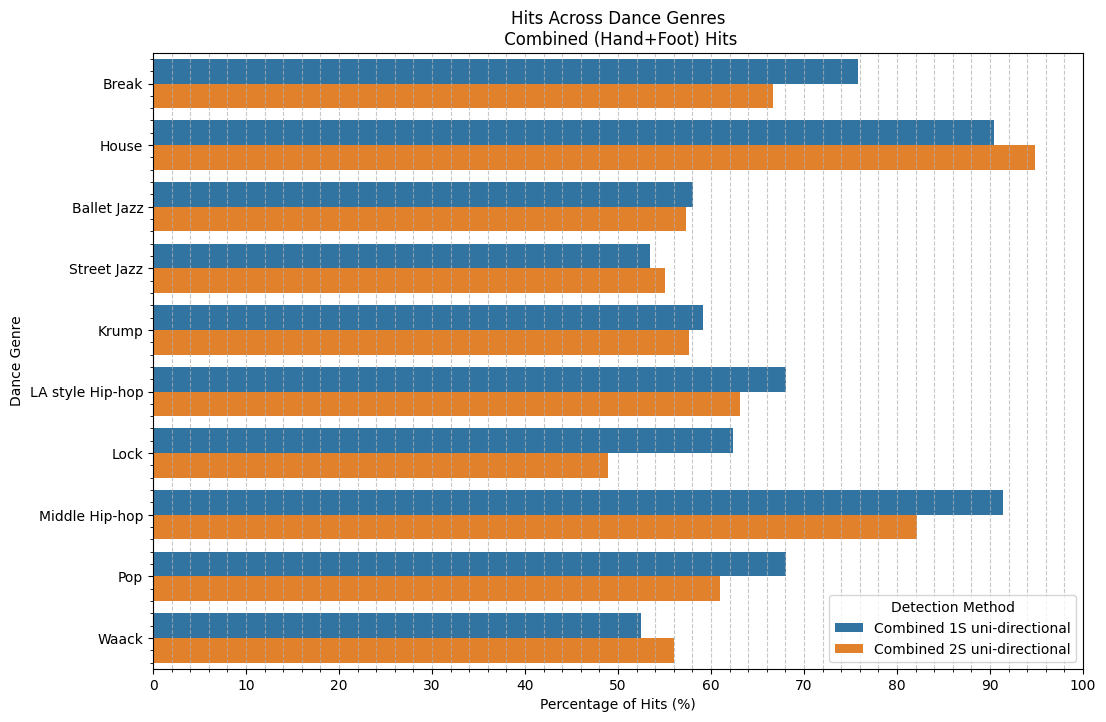

In [44]:
# Load data
df = pd.read_csv("./stats/combined_genrewise_hits.csv")

# Prepare DataFrame in long format for Seaborn
df_long = pd.concat([
    df[['Agenre_name', 'Apercentage']].rename(columns={'Agenre_name': 'Genre', 'Apercentage': 'Acc1 Percentage'}).assign(Method='Combined 1S uni-directional'),
    df[['Bgenre_name', 'Bpercentage']].rename(columns={'Bgenre_name': 'Genre', 'Bpercentage': 'Acc1 Percentage'}).assign(Method='Combined 2S uni-directional')
])

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_long, x="Acc1 Percentage", y="Genre", hue="Method", orient="h")

# Formatting
plt.xlabel("Percentage of Hits (%)")
plt.ylabel("Dance Genre")
plt.title("Hits Across Dance Genres\n Combined (Hand+Foot) Hits")
plt.legend(title="Detection Method")
plt.grid(axis='x', linestyle="--", alpha=0.7, which='both')
plt.minorticks_on()
plt.xticks(np.arange(0, 100+1, 10))

# plt.savefig("./stats/combined_genre_hits.png")
plt.show()


## SAVE CSV

In [ ]:
# SAVE TO CSV
L1 = [foot2S_hits, hand2S_hits, combined2S_hits]
file_names = ["./stats/foot2S_hits.csv", "./stats/hand2S_hits.csv", "./stats/combined2S_hits.csv"]

# Save each hit data as a CSV file
for item, file_name in zip(L1, file_names):
    hit1S_idx = list(item)
    hit1S_df = foot_1S_df.iloc[hit1S_idx]  # Ensure foot_1S_df is defined
    new = hit1S_df.groupby(['dance_genre']).size().reset_index(name='count')

    # Add total count and percentage columns
    new['total_count'] = new['dance_genre'].map(genre_Tcount)
    new['percentage'] = round((new['count'] / new['total_count']) * 100, 2)

    # Save to CSV
    new.to_csv(file_name, index=False)